In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

C:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
(X_train, y_train) , (X_test, y_test) = \
keras.datasets.fashion_mnist.load_data()

In [23]:
train_scaled = X_train.reshape(-1, 28, 28, 1) / 255.0

In [24]:
train_scaled, val_scaled, y_train, val_target = \
train_test_split(train_scaled, y_train, test_size = 0.2)

In [25]:
train_scaled.shape

(48000, 28, 28, 1)

In [26]:
model = keras.Sequential()

In [27]:
model.add(keras.layers.Conv2D(
    32, 
    kernel_size=3, 
    activation='relu',
    padding='same', #테두리 전부 0,
    input_shape = (28, 28, 1)
    )
)

In [28]:
model.add(keras.layers.MaxPooling2D(2))

In [29]:
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size=3,
        activation='relu',
        padding='same'
    )
)

In [30]:
model.add(keras.layers.MaxPooling2D(2))

In [31]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(100, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,616 (1.31 MB)

 Trainable params: 342,616 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
) #여러가지 parameter 지정
cp_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                               save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True,
)
history = model.fit(
    train_scaled,
    y_train, 
    epochs=20,
    validation_data = (val_scaled, val_target),
    callbacks =[cp_cb, es_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7240 - loss: 0.8674 - val_accuracy: 0.8785 - val_loss: 0.3377
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8687 - loss: 0.3651 - val_accuracy: 0.8938 - val_loss: 0.2957
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8930 - loss: 0.3019 - val_accuracy: 0.9004 - val_loss: 0.2687
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9041 - loss: 0.2660 - val_accuracy: 0.9071 - val_loss: 0.2503
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9144 - loss: 0.2390 - val_accuracy: 0.9109 - val_loss: 0.2398
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9188 - loss: 0.2206 - val_accuracy: 0.9084 - val_loss: 0.2594
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9301 - loss: 0.1916 - val_accuracy: 0.9195 - val_loss: 0.2221
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9335 -

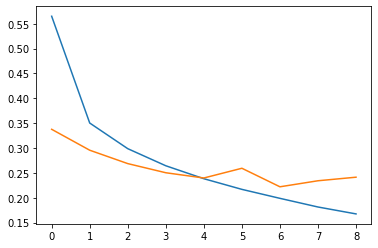

In [39]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [41]:
val_scaled[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.39607843],
        [0.51764706],
        [0.26666667],
        [0.34509804],
        [0.59607843],
        [0.3254902 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.        ],
        [0.14901961],
        [0.78431373],
        [0.97647059],
        [0.98431373],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.98431373],
        

In [42]:
model.predict(val_scaled[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[3.19276797e-03, 1.39608548e-03, 1.85869783e-02, 2.35257833e-03,
        9.16711032e-01, 2.55966071e-09, 5.76336049e-02, 3.96760358e-09,
        1.26861662e-04, 1.11787891e-07, 5.37249010e-13, 1.22052212e-11,
        2.54080923e-11, 1.23040879e-12, 3.39765785e-11, 1.83214457e-10,
        2.19457894e-12, 5.09506257e-11, 2.03572489e-12, 1.11326668e-11,
        3.23598821e-11, 1.76171369e-11, 1.44119175e-10, 1.79678945e-11,
        6.01154057e-11, 1.70115935e-11, 1.72814662e-11, 8.01237632e-10,
        7.49927984e-12, 1.00230234e-10, 1.95318914e-10, 4.57072463e-10,
        3.24084336e-11, 5.92003321e-11, 1.17872781e-10, 2.64551436e-10,
        2.64102594e-11, 8.58054044e-11, 7.14029356e-12, 5.16248190e-11,
        1.15212555e-10, 1.87728002e-12, 1.09733812e-10, 5.05394684e-11,
        5.00635991e-11, 2.48460502e-10, 1.15590211e-11, 1.51407567e-11,
        3.65952224e-09, 8.36717293e-11, 5.44554069e-10, 1.63288317e-12,
        7.30454672e-12, 1.58901045e-10, 1.50246010e-10, 4.575799